## Main configs

In [1]:
#only run one time 

#!pip install bs4
#!pip install matplotlib
#!pip install numpy
#!pip install requests
#!pip install httplib2
#!pip install nltk
#!pip install import_ipynb
#!pip install textacy
#!pip install spacy
#!pip install scispacy

# !python -m spacy download en_core_web_lg
# !python -m spacy download en_core_web_md
# !python -m spacy download en_core_web_sm

import nltk
#nltk.download('punkt')
#nltk.download('treebank')
#nltk.download('omw-1.4')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('maxent_treebank_pos_tagger')
#nltk.download('stopwords')
#nltk.download('wordnet')

  Attempting uninstall: en-core-web-lg
    Found existing installation: en-core-web-lg 3.3.0
    Uninstalling en-core-web-lg-3.3.0:
      Successfully uninstalled en-core-web-lg-3.3.0
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


You should consider upgrading via the 'c:\Users\makm7\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


  Attempting uninstall: en-core-web-md
    Found existing installation: en-core-web-md 3.3.0
    Uninstalling en-core-web-md-3.3.0:
      Successfully uninstalled en-core-web-md-3.3.0
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


You should consider upgrading via the 'c:\Users\makm7\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 3.3.0
    Uninstalling en-core-web-sm-3.3.0:
      Successfully uninstalled en-core-web-sm-3.3.0
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


You should consider upgrading via the 'c:\Users\makm7\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [6]:
from bs4 import BeautifulSoup, SoupStrainer
import matplotlib.pyplot as plt
import numpy as np
import requests
import httplib2
import os
from os.path import exists
import csv
import copy
import import_ipynb
import nltk
import functions as Fun
import time
from scipy.stats import sem

In [7]:

result_path = "../result"


categories = ["tech", "sport", "business", "politics", "entertainment", "others"]
words = [" and ", " or ", " nor ", " if ", " because ", " unless "] # to do


categories_occurences = {}

categories_occurences = dict.fromkeys(categories, 0)



website_list = {

    'New York Post' : 'https://nypost.com/',
    'The Guardian' : 'https://www.theguardian.com/',
    'The New York Times' : 'https://www.nytimes.com/',
    'The Washington Times' : 'https://www.washingtontimes.com/',
    'The Wall Street Journal' : 'https://www.wsj.com/',
    'The New York Daily News' : 'https://www.nydailynews.com/',
    'bbc' : 'https://www.bbc.com/',
    
}

websites_num_links = {}
websites_num_links = dict.fromkeys(website_list.keys(), 0)
leftLinks = set([])


### Links extractor

In [9]:
for website_name, link in website_list.items():

    
    headers = requests.utils.default_headers()

    headers.update(
        {
            'User-Agent': 'My User Agent 1.0',
        }
    )

    url_extract = requests.get(link, headers= headers).text
    s = ""
    if link == "https://nypost.com/":
        link = link + "20"
    soup = BeautifulSoup(url_extract, )
    texts = soup.find_all('a')
    for L in texts:
        s+= str(L)
    s = set(s.split('"'))
    path = result_path + '/'+website_name
    if not os.path.exists(path):
        os.makedirs(path)
    if not os.path.exists(path + '/texts'):
        os.makedirs(path+ '/texts')
    time.sleep(1)
    

    
    if not os.path.exists(path+"/"+website_name+"_Links.txt"):
        outFile = open(path+"/"+website_name+"_Links.txt", "w+")
        newList = ''
    else :
        outFile = open(path+"/"+website_name+"_Links.txt", "r+")
        newList = outFile.read()
    newList = set(newList.split('\n'))
    newList.remove('')
    
    for x in s:
        newLink = ''
        if x.startswith('/news/2022') and '-' in x and not (".svg" in x or ".png" in x )  :
            newLink = link + x[1:] 
        if (x.startswith(link) and '-' in x and len(x) >60 and not (".svg" in x or ".png" in x)) or x.startswith('https://nypost.com/2022/') :
            newLink = x 
        

        if newLink != '' and not newLink in newList :
            newList.add(newLink)
        
    outFile = open(path+"/"+website_name+"_Links.txt", "w+")
    for x in newList:
        outFile.write(x + "\n")
    websites_num_links[website_name] = len(newList)
    outFile.close()

KeyboardInterrupt: 

In [9]:
print(sum(websites_num_links.values()))

websites_num_links

7206


{'New York Post': 1115,
 'The Guardian': 876,
 'The New York Times': 642,
 'The Washington Post': 1451,
 'The Washington Times': 508,
 'The Wall Street Journal': 680,
 'The New York Daily News': 1903,
 'bbc': 31}

### Artical text extractor

In [6]:

checking = open('checking.txt', 'w', encoding= 'utf-8')
check = ""
for website_name, link in website_list.items():

    path = result_path + '/' + website_name

    inFile = open(result_path + '/' +website_name+'/'+website_name+"_Links.txt", "r")
    links = inFile.readlines()
    for n in links:
        n = n.strip()
        s =  Fun.scrapText(n.strip())

        genre , chance = FS.predict_from_text(s)

        check += n + "\n" + genre + " " + str(chance) + "\n\n"
        checking.write(n + "\n" + genre + " " + str(chance) + "\n\n")
        print(genre, chance)
        if np.float32(chance) < 55.0:
            genre = "others"
        categories_occurences[genre] += 1
        

        outFile = open(result_path + '/'+website_name+'/texts/'+ genre +".txt", "a+" , encoding='utf-8' )

        outFile.write(s)
        outFile.write('\n')
        outFile.close()

NameError: name 'FS' is not defined

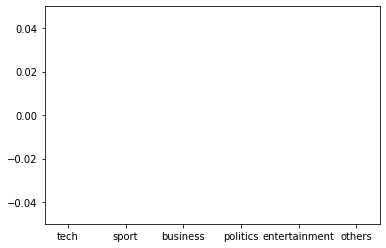

In [40]:
plt.bar(range(len(categories_occurences)), list(categories_occurences.values()), tick_label=list(categories_occurences.keys()))
plt.margins(0)
plt.show()

## Analytics


In [6]:

categories_statistics = {
    'tech': {},
    'sport': {},
    'business': {},
    'politics': {},
    'entertainment': {},
    'others': {}
}


words_statistics = {
    ' and ': {},
    ' or ': {},
    ' nor ': {},
    ' if ': {},
    ' because ': {},
    ' unless ': {}
}

for category in categories_statistics.keys():
    for word in words:
        categories_statistics[category][word] = 0

for word in words_statistics.keys():
    for category in categories:
        words_statistics[word][category] = 0
website_list = {
    'bbc' : 'https://www.bbc.com/',
    'Khaleej Times' : '',
}
categories_length = dict.fromkeys(categories, 0)



NameError: name 'words' is not defined

In [17]:

for website_name, link in website_list.items():
    for key,value in categories_statistics.items():
        path = result_path + '/'+website_name+'/texts/'+ key +".txt"
        if not os.path.isfile(path): continue
        text = open(path , "r", encoding='utf-8')
        text = text.read()
        categories_statistics[key] = Fun.get_statistics(text, value)
        categories_length[key] += len(text.split())
      

{'tech': 31015,
 'sport': 9746,
 'business': 7760,
 'politics': 0,
 'entertainment': 57377,
 'others': 18894}

In [21]:
for website_name, link in website_list.items():
    for word in words_statistics.keys():
        for category in categories:
            if categories_length[category] > 0 :
                words_statistics[word][category] = 100*categories_statistics[category][word]/(categories_length[category])
            else:
                words_statistics[word][category] = 0


In [ ]:
for word,occurrences in words_statistics.items():

    error = sem(list(occurrences.values()))

    standard_deviation = '{:.2f}'.format(np.std(list(occurrences.values())))

    #The error is Standard Error of Mean

    plt.bar(range(len(occurrences)), list(occurrences.values()), yerr = error, tick_label=list(occurrences.keys()), alpha = 0.75,capsize = 3)

    plt.Axes.set_xmargin(plt.gca(), 0)

    plt.title(word)

    plt.xlabel('categories')

    plt.ylabel('occurrences')

    plt.figtext(0, 0,'Standard deviation: '+str(standard_deviation))

    plt.show()

    plt.savefig(result_path+ '/word_statistics/'  + word + '.eps', format='eps')

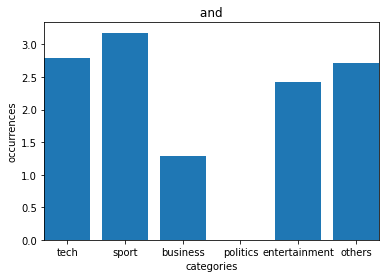

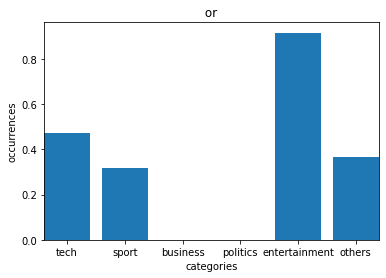

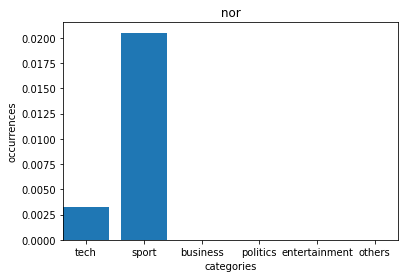

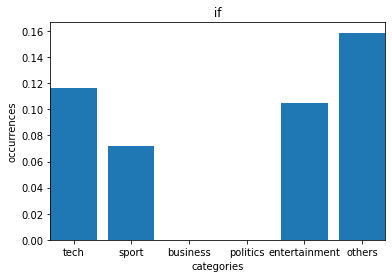

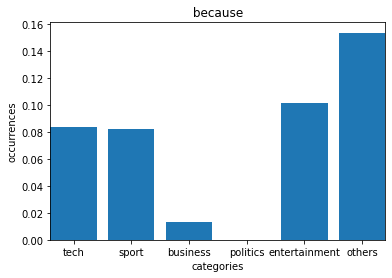

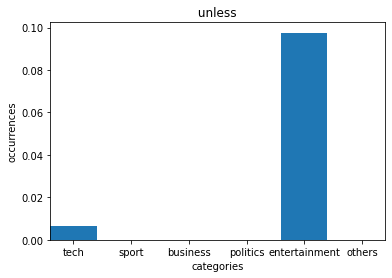

<Figure size 432x288 with 0 Axes>

In [22]:
for word,occurrences in words_statistics.items():
    plt.bar(range(len(occurrences)), list(occurrences.values()), tick_label=list(occurrences.keys()))
    plt.Axes.set_xmargin(plt.gca(), 0)
    plt.title(word)
    plt.xlabel('categories')
    plt.ylabel('occurrences')
    plt.show()
    plt.savefig(result_path+ '/word_statistics/'  + word + '.eps', format='eps')

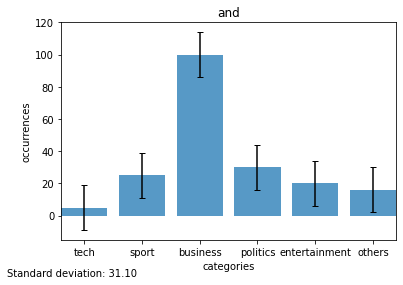

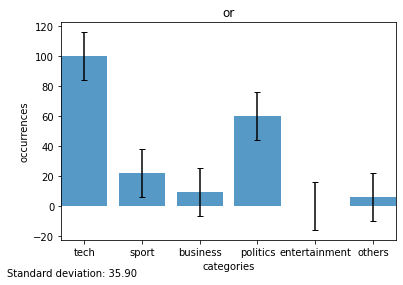

In [13]:
import matplotlib.pyplot as plt
from scipy.stats import sem
import numpy as np

def graph(word, occurrences):
    x= plt
    error = sem(list(occurrences.values()))
    standard_deviation = '{:.2f}'.format(np.std(list(occurrences.values())))
    #The error is Standard Error of Mean
    x.bar(range(len(occurrences)), list(occurrences.values()), yerr = error, tick_label=list(occurrences.keys()), alpha = 0.75,capsize = 3)
    x.Axes.set_xmargin(plt.gca(), 0)
    x.title(word)
    x.xlabel('categories')
    x.ylabel('occurrences')
    x.figtext(0, 0,'Standard deviation: '+str(standard_deviation))
    # plt.savefig(result_path+ '/word_statistics/'  + word + '.eps', format='eps')
    return x

words = {
    'and' : {
        'tech' : 5,
        'sport' : 25,
        'business' : 100,
        'politics' : 30,
        'entertainment' : 20,
        'others' : 16
    },
    'or' : {
        'tech' : 100,
        'sport' : 22,
        'business' : 9,
        'politics' : 60,
        'entertainment' : 0,
        'others' : 6
    }
}

graph('and', words['and']).show()
graph('or', words['or']).show()